In [103]:
import networkx as nx
import pickle as pk
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [104]:
fn = './data/pipe_TM.shp'
G = nx.read_shp(fn)
len(G.nodes)

4394

In [105]:
# extract largest component
def extract_biggest_connected_subgraph(G):
    Gcc = sorted(nx.connected_components(nx.to_undirected(G)), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    numNodes_before = len(G.nodes)
    numNodes_after = len(G0.nodes)
    print(f"Size of Original Graph: {numNodes_before}")
    print(f"Size of Biggest Component: {numNodes_after}")
    return G0

In [106]:
G0 = extract_biggest_connected_subgraph(G)

Size of Original Graph: 4394
Size of Biggest Component: 1844


*extract topological graph*

In [107]:
G = G0

In [108]:
numNodes = len(G.nodes)
numNodes

1844

In [109]:
# rename node
labels_before = list(G.nodes)
labels_after = list(range(numNodes))
mapping = dict(zip(labels_before, labels_after))

In [110]:
H = nx.relabel_nodes(G, mapping)

In [112]:
def has_path(G, node_i, node_j):
    has_path0 = nx.has_path(G, node_i, node_j)
    has_path1 = nx.has_path(G, node_j, node_i)
    if has_path0 & has_path1:
        print(node_i, node_j, 'Loop!')
        return (node_i, node_j)
    if has_path0:
        return (node_i, node_j)
    if has_path1:
        return (node_j, node_i)
    return (np.nan, np.nan)

In [113]:
def generate_connectivity_table(H, nodes):
    length = len(nodes)

    connectivity_table = []
    for i in range(length-1):
        node_i = nodes[i]
        for j in range(i+1, length):
            node_j = nodes[j]
            connectivity_table.append([node_i, node_j, has_path(H, node_i, node_j)])
    return connectivity_table

In [114]:
def creat_subgraph(nodes, connectivity_table):
    Gsub = nx.Graph().to_directed()

    # add nodes
    for node in nodes:
        Gsub.add_node(node)

    # add edges
    for node_i, node_j, link in connectivity_table:
        if link == (np.nan, np.nan):
            continue
        else:
            Gsub.add_edge(link[0], link[1])
    return Gsub

In [115]:
def extract_connectivity_subgraph(H, labels_after, N):
    positive_nodes = random.sample(labels_after, N)
    #print(positive_nodes)

    connectivity_table = generate_connectivity_table(H, positive_nodes)
    Gsub = creat_subgraph(positive_nodes, connectivity_table)
    return Gsub

def plot_graph(G):
    display(nx.draw(Gsub, with_labels=True))
    return

In [96]:
# import time

# repetitive_times = 20

# N = 50

# start = time.time()

# for i in range(repetitive_times):
#     Gsub = extract_connectivity_subgraph(H, labels_after, N)
    
# end = time.time()
# print("Time Cost:{:.2f}. {:.2f}s per iteration.".format(end-start, (end-start)/repetitive_times))

Time Cost:2.80. 0.14s per iteration.


None

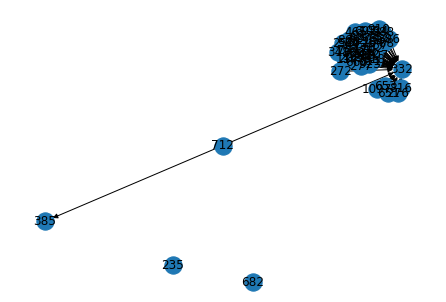

In [91]:
#plot_graph(Gsub)

*test efficiency*

In [120]:
def time_the_function(N, repetitive_time=10):

    start = time.time()

    for i in range(repetitive_times):
        Gsub = extract_connectivity_subgraph(H, labels_after, N)

    end = time.time()
    
    return (end-start)/repetitive_times


ans = []
for Ni in [5,10,20,30,50,75,100,150,200,250,300]:
    avg_run_time = time_the_function(Ni, 10)
    ans.append([Ni, avg_run_time])
    print(Ni, avg_run_time)
    
ans

5 0.0011967897415161132
10 0.004936802387237549
20 0.01942763328552246
30 0.04448099136352539
50 0.1252833604812622
75 0.2779245495796204
100 0.5136261820793152
150 1.1139206171035767
200 1.9760397911071776
250 3.1304768204689024
300 4.472188341617584


[[5, 0.0011967897415161132],
 [10, 0.004936802387237549],
 [20, 0.01942763328552246],
 [30, 0.04448099136352539],
 [50, 0.1252833604812622],
 [75, 0.2779245495796204],
 [100, 0.5136261820793152],
 [150, 1.1139206171035767],
 [200, 1.9760397911071776],
 [250, 3.1304768204689024],
 [300, 4.472188341617584]]

In [121]:
pd.DataFrame(ans, columns=['N', 'Seconds Per Iteration']).to_csv('./runtime_subgraphExtraction1844.csv', index=False)

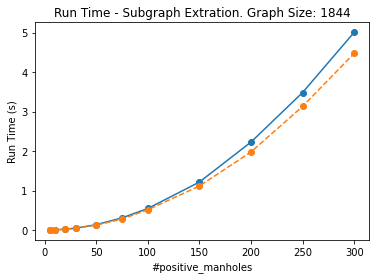

In [125]:
t1213 = pd.read_csv('./runtime_subgraphExtraction1213.csv')
t1844 = pd.read_csv('./runtime_subgraphExtraction1844.csv')

plt.plot(t1213['N'], t1213['Seconds Per Iteration'], 'o-')
plt.plot(t1844['N'], t1844['Seconds Per Iteration'], 'o--')
plt.xlabel('#positive_manholes')
plt.ylabel('Run Time (s)')
plt.title('Run Time - Subgraph Extration. Graph Size: 1844')
plt.show()

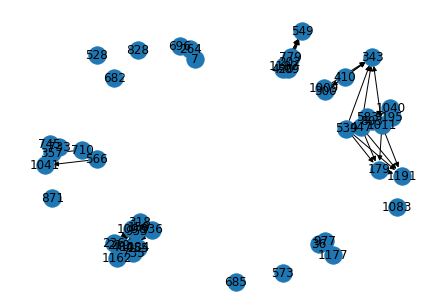

In [84]:
# nx.draw(Gsub, with_labels=True)

In [79]:
labels_before[979], labels_before[355]

((815460.9704, 826721.4958999995), (815319.2229000004, 826877.0515999999))